# Classification de documents avec un Scikit-Learn 
## (modèle de machine learning)

Pour plus d'information :
- Pipeline : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- TfidfVectorizer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- MultinomialNB : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Un article de blog qui explique le TFIDF:
- https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3

Un article de blog qui explique les naive bayes:
- https://towardsdatascience.com/naive-bayes-classifier-explained-54593abe6e18

### Imports & Préparer les données

In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn #not sure this is needed yet
from pprint import pprint
import numpy as np
#from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, accuracy_score #additional import 
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd #not sure this is needed yet
import re #not sure this is needed yet
import operator
import nltk
nltk.download('stopwords')


import os
from collections import defaultdict
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import existing data from the word cloud notebook (requires that tokenization from halley_word_cloud.ipynb has already been run)

data_path = "../../data/halley/halley_txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

print(f"Number of articles: {len(files)}")
print(f"Sample filenames:")
for filename in files[:5]:
    print(f"  {filename}")

Number of articles: 551
Sample filenames:
  KB_JB1051_1927-08-25_01-00004.txt
  KB_JB1051_1937-11-14_01-00006.txt
  KB_JB1051_1939-08-06_01-00005.txt
  KB_JB1051_1957-04-18_01-00004.txt
  KB_JB1051_1957-10-14_01-00001.txt


In [3]:
#brought over from halley_word_cloud
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "elles",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", ":", "même", "voir", "fois", "jour", "année", "ans", "faites", "le", "la", "de"]

# New stopwords to add
git_stopwords = [
    "a", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", "bigre", "bon", "boum", "bravo", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain", "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun", "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables", "compris", "concernant", "contre", "couic", "crac", "dans", "de", "debout", "dedans", "dehors", "deja", "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different", "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement", "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit", "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début", "désormais", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes", "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait", "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "gens", "haut", "hein", "hem", "hep", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé", "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", "lui-meme", "lui-même", "là", "lès", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale", "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale", "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même", "mêmes", "na", "n'a" "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf", "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes", "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "oh", "ohé", "ollé", "olé", "on", "ont", "onze", "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "où", "paf", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant", "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne", "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf", "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour", "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement", "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui", "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable", "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "sa", "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble", "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous", "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles", "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet", "superpose", "sur", "surtout", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement", "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres", "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "un", "une", "unes", "uniformement", "unique", "uniques", "uns", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous", "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "zut", "à", "â", "ça", "ès", "étaient", "étais", "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"
]

#domaine specific 
specific_stopwords = [
"rue", "-", "drapeau", "DRAPEAU", "LE", "ROUGE", "com", "qu'il", "d'une", "d'un", "l'on", "qu'il", "qu'ils", "qu'elle", "qu'elles", "qu", "il", "elle", "c", "est", "elles", "ils", "vient", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "soir", "ment", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "déjà"
#garder les noms des villes pour faire une analyse spatiale? 
#does it also include common first names?
#does it also include uppercase versions?
#à voir : soir, matin = seront pe liés au nom du journal et non du temps de la journée, define what a stopword means in this context
]

#stop words supplémentaires de nltk
stops = set(stopwords.words('french'))

sw += git_stopwords
sw += specific_stopwords
sw += stops
sw = set(sw)


print(f"{len(sw)} stopwords:\n {sorted(sw)}")

723 stopwords:
 ['-', ':', 'DRAPEAU', 'LE', 'ROUGE', 'a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'année', 'ans', 'anterieur', 'anterieure', 'anterieures', 'août', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autant', 'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'celà', 'c

In [4]:
#Tokenize each file individually then save each token in a dictionary
#I think it's best to first see all of they keywords per file before aggregating and then doing one big word cloud for the whole set, or just a certain period. I would've wanted to compare the wordcloud of the different periods ngl. I mean, at least I could do that for la libre belgique or whatever it was that was also reporting in 1835

data_path = "../../data/halley/halley_txt/"
tokenised_files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

tokens_by_file = {}

for filename in tokenised_files:
    filepath = os.path.join(data_path, filename)
    
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read() # Récupérer le texte du fichier individualement 

    
    # Tokenize
    tokens = nltk.wordpunct_tokenize(text) # Extraire les tokens du texte en cours
    
    # Filtrer les tokens =>  garder les mots de plus de 2 lettres, alphabétiques et pas dans les stopwords, les autres sont des mots parasites
    filtered_tokens = [w.lower() for w in tokens 
                      if len(w) > 2 # Ne garder que les mots de plus de 2 lettres
                      if w.isalpha() 
                      and w.lower() not in sw #filterer pour les stopwords et les lowercase
                      and not re.search(r'(.)\1{2,}', w.lower())] #filtrer les lettres qui se repetent avec un regex
    
    tokens_by_file[filename] = filtered_tokens

print(len(tokenised_files))

551


In [5]:
# Check a sample document
sample_file = list(tokens_by_file.keys())[0]
print(f"\nSample file: {sample_file}")
print(f"Number of tokens: {len(tokens_by_file[sample_file])}")
print(f"First 20 tokens: {tokens_by_file[sample_file][:20]}")

# Parse filename to show structure
parts = sample_file.split('_')
print(f"\nFilename structure:")
print(f"  Source: {parts[0]}")
print(f"  Newspaper: {parts[1]}")
print(f"  Date: {parts[2]}")
print(f"  Page: {parts[3]}")


Sample file: KB_JB1051_1927-08-25_01-00004.txt
Number of tokens: 1603
First 20 tokens: ['rouge', 'edison', 'revendique', 'priorité', 'invention', 'phonographe', 'signalé', 'dernièrement', 'mort', 'poète', 'savant', 'français', 'charles', 'croa', 'considéré', 'inventeur', 'phonographe', 'décrit', 'mécanisme', 'edison']

Filename structure:
  Source: KB
  Newspaper: JB1051
  Date: 1927-08-25
  Page: 01-00004.txt


## Créer, tester, et évaluer les différents modèles

### Classification Binaire: tester le functionnement du modèle

#### Créer des labels & séparer le train/test

In [8]:
# binary labels: mentions Halley vs doesn't mention Halley
labels_halley_binary = []
texts_halley = []

for filename, tokens in tokens_by_file.items():
    # Check if 'halley' is in the tokens
    if 'halley' in tokens:
        labels_halley_binary.append('mentions_halley')
    else:
        labels_halley_binary.append('no_halley')
    
    # Join tokens back into text for the classifier
    texts_halley.append(' '.join(tokens))

# Convert to numpy array
targets_halley = np.array(labels_halley_binary)

print(f"Total documents: {len(texts_halley)}")
print(f"\nClass distribution:")
from collections import Counter
print(Counter(targets_halley)) #check that there is at least one document in each class

Total documents: 551

Class distribution:
Counter({'mentions_halley': 551})


In [9]:
# Check some examples from each class  (to verify labeling of binary classification)
print("\n=== MENTIONS HALLEY ===")
for i, (label, text) in enumerate(zip(labels_halley_binary, texts_halley)):
    if label == 'mentions_halley':
        print(f"Sample {i}: {text[:100]}...")
        if i >= 2:  # Show 3 examples
            break

print("\n=== NO HALLEY ===")
for i, (label, text) in enumerate(zip(labels_halley_binary, texts_halley)):
    if label == 'no_halley':
        print(f"Sample {i}: {text[:100]}...")
        if i >= 3:  # check that indeed there should be no NO halley's since that's the keyword used to find the document in the first place = labeler is good 
            break


=== MENTIONS HALLEY ===
Sample 0: rouge edison revendique priorité invention phonographe signalé dernièrement mort poète savant frança...
Sample 1: péchons baleine mini îuii iin iriririnur rateiinier soviétiques baleine pèse tonnes bord bateau immé...
Sample 2: page famille snfants chronique medicale enfants lacher monstre ballonnets naangerca excel lento crèm...

=== NO HALLEY ===


#### Split data (80% train, 20% test) 

The data is split into training and testing by using train_test_split from sklearn which randomly splits the data into training and testing sets based on the specified test size, while preserving class distribution across both sets using stratify. 


In [11]:
#(binary classification split)
X_train, X_test, y_train, y_test = train_test_split(
    texts_halley, 
    targets_halley, 
    test_size=0.2, 
    random_state=11,
    stratify=targets_halley  # Ensures balanced split
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print("\nTraining set distribution:")
print(Counter(y_train))

print("\nTest set distribution:")
print(Counter(y_test))

Training set size: 440
Test set size: 111

Training set distribution:
Counter({'mentions_halley': 440})

Test set distribution:
Counter({'mentions_halley': 111})


#### Entrainement & Prédictions


In [12]:
# Définition du type de modèle (classification binaire)
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=list(sw),  # Uses same sw as word cloud notebook
        min_df=5,              # increased from 2 to 5 to reduce noise
        max_df=0.8,            # Ignore words in more than 80% of documents
        max_features=5000       # Limit to top 5000 features (to reduce noise)
    )),
    ('classifier', MultinomialNB()),
])

unique_classes = ['mentions_halley', 'no_halley']  ## The classifier learned probabilities for 2 classes


In [13]:
# Entrainement du modèle
classifier.fit(X_train, y_train)

c:\Users\casia\testTAC\tac\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anaturel', 'quelqu', 'rouge'] not in stop_words.
  warnings.warn(


,steps,"[('vectorizer', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


#### Interprétation
Le TFIDF calcule le score IDF de chaque mot du corpus

In [14]:
feature_names = classifier.named_steps['vectorizer'].get_feature_names_out()
idf_scores = classifier.named_steps['vectorizer'].idf_

# Taille du vocabulaire
len(feature_names)
#increasing min_df and max_features reduced the vocab size by about 2000 words, that's good



5000

In [15]:
# Score IDF de chaque terme du vocabulaire
for i in range(0, 10):
    print(feature_names[i], ':', round(idf_scores[i], 2))

#SO much better after having increased min_df and limited max_features

abandon : 3.26
abandonner : 2.9
abandonné : 3.16
abattre : 3.45
abbé : 2.78
abondance : 3.18
abondante : 3.3
abonnement : 2.48
abonnements : 2.61
abonnés : 3.38


In [16]:
# Les 50 mots avec le score IDF le plus haut
for word, score in sorted(zip(feature_names, idf_scores), key=operator.itemgetter(1), reverse=True)[:50]:
    print(word, round(score, 2))

#ok this is messier than I expected it to be, maybe a problem with the clearing of stopwords
#not stop words, but the tf-IDF was identifying words that were OCR anomalies, too rare to be actual words. Still getting some weird ones but hey these at least COULD be real words


cath 5.3
sold 5.3
ormesson 5.01
centiares 4.89
juill 4.89
peary 4.89
orch 4.79
rég 4.79
geneviève 4.69
vaes 4.69
angl 4.6
cim 4.6
farman 4.6
pluviôse 4.6
satin 4.6
dito 4.52
priv 4.52
cook 4.45
dupret 4.45
bourget 4.38
créd 4.38
electr 4.38
peloton 4.38
ecrire 4.32
elect 4.32
spaak 4.32
comédien 4.26
escrime 4.26
sise 4.26
banq 4.2
championnats 4.2
disp 4.2
ecr 4.2
nov 4.2
pens 4.2
rubber 4.2
sculpture 4.2
boissons 4.14
bouchers 4.14
etude 4.14
jack 4.14
mutuel 4.14
textile 4.14
vache 4.14
lib 4.09
marcinelle 4.09
monarchie 4.09
notaires 4.09
pilules 4.09
verrerie 4.09


Le TF-IDF transforme chaque document en vecteur de la taille du vocabulaire et donc le score est le TFIDF (fréquence du terme dans le document * idf)

In [17]:
tmp = classifier.named_steps['vectorizer'].transform(X_train[:10])
pd.DataFrame(tmp.toarray(), 
             columns=classifier.named_steps['vectorizer'].get_feature_names_out())

,abandon,abandonner,abandonné,abattre,abbé,abondance,abondante,abonnement,abonnements,abonnés,...,événements,évêque,évêques,êtres,île,îles,œil,œufs,œuvre,œuvres
0,0.000000,0.012218,0.0,0.000000,0.0,0.0,0.013927,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.008357,0.034871,0.006083,0.000000
1,0.000000,0.000000,0.0,0.022325,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.025654,0.017841,0.000000,0.049057
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.023250,0.000000,0.000000,0.000000,...,0.033607,0.0,0.000000,0.0,0.000000,0.023746,0.000000,0.000000,0.050778,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.005724,0.000000,0.000000,0.000000,...,0.002068,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001250,0.000000
4,0.021145,0.000000,0.0,0.022384,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.037450,0.061486
5,0.000000,0.021231,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.057374,0.000000,...,0.034981,0.0,0.000000,0.0,0.000000,0.000000,0.043565,0.000000,0.021142,0.000000
6,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.033686,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.022889,0.013447,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.037703,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.020840,0.013686
8,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.020935,...,0.000000,0.0,0.023526,0.0,0.044613,0.000000,0.000000,0.000000,0.017907,0.000000
9,0.000000,0.000000,0.0,0.026124,0.0,0.0,0.000000,0.018801,0.000000,0.000000,...,0.018079,0.0,0.028711,0.0,0.000000,0.000000,0.000000,0.000000,0.021854,0.000000


Le modèle naïf bayésien apprend la corrélation entre chaque mot et chaque catégorie

In [ ]:
pd.DataFrame(classifier.named_steps['classifier'].feature_log_prob_,
              index=unique_classes, 
              columns=feature_names).T

#Value error due to imbalanced class distribution = expected, every document mentions Halley (confirmed by the confusion matrix)

ValueError: Shape of passed values is (1, 5000), indices imply (2, 5000)

In [21]:
# Predict on test set
y_pred = classifier.predict(X_test)

# Show some predictions vs actual
print("\nSample predictions:")
print(f"{'Actual':<20} {'Predicted':<20} {'Correct?'}")
print("-" * 50)
for i in range(10):
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{y_test[i]:<20} {y_pred[i]:<20} {correct}")


Sample predictions:
Actual               Predicted            Correct?
--------------------------------------------------
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓
mentions_halley      mentions_halley      ✓


#### Evaluation

In [23]:
# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.2%}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Overall Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

mentions_halley       1.00      1.00      1.00       111

       accuracy                           1.00       111
      macro avg       1.00      1.00      1.00       111
   weighted avg       1.00      1.00      1.00       111



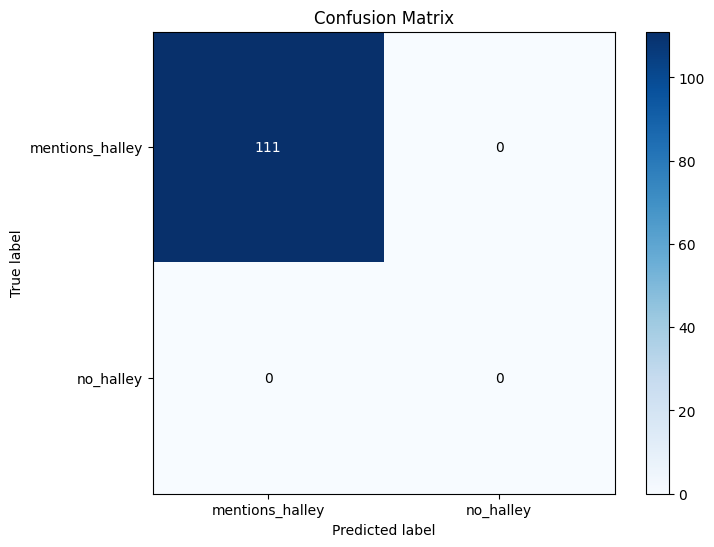

In [24]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, 
                     figsize=(8, 6), 
                     labels=['mentions_halley', 'no_halley'])
plt.show()

## Classification par type d'evenement 

#### Créer des labels & séparer le train/test

In [6]:
# Type of occurence (meteor shower detection etc) 
#These patterns were identified by looking at the word clouds and the documents themselves
def classify_meteor_shower_mention(tokens):
    showers_text = ' '.join(tokens).lower()
    
    # Aquarides (May shower)
    aquarid_patterns = ['aquaride', 'aquarides', 'eta aquariids', 'eta aquarids', 'eta aquarides', 'eta aquarid', 'eta aquaride'] #excluded mai because then most of 1910 would be classified as aquarides
    
    # Orionides (October shower)
    orionid_patterns = ['orionide', 'orionides', 'octobre']
    
    # General meteor/shooting stars
    meteor_general = ['étoiles filantes', 'météores']

    #mention of other comets
    autre_comet = [ 'Roland', 'Arend', 'Arend-Roland', 'comète de Roland', 'comète d\'Arend', 'comète Arend-Roland', 'comète d\'Arend-Roland'] #I can't use nouvelle or découverte bc it's often mentioned how it was 'discovered'

    #expected_halley_patterns = aquarid_patterns + orionid_patterns + ['halley', 'halley\'s']

    
    # Check for specific showers or apparitions first
    if any(pattern in showers_text for pattern in aquarid_patterns):
        return 'aquarides'
    elif any(pattern in showers_text for pattern in orionid_patterns):
        return 'orionides'
    elif any(pattern in showers_text for pattern in meteor_general) and not any(pattern in showers_text for pattern in aquarid_patterns) and not any(pattern in showers_text for pattern in orionid_patterns):
        return 'unassociated_shower_mentions_halley' #the extra lines might be redundant but just to be sure
    #elif 'halley' in tokens or 'comète' in tokens: #
        #return 'halley_only'
    elif any(pattern in showers_text for pattern in autre_comet) and not '1705' and not '1758': #based on observation of KB_JB427_1948-11-30_01-00007 and KB_JB1051_1957-04-18_01-00004, gonna give it a try
        return 'other_comet' #1705 is a risk because they still could mention Halley in the same document, but it's going to be hard to identify other comets without a list of names
    #didn't do anything anyways lol 
    else:
        return 'halley_only'

labels_showers = []
texts_showers = []

for filename, tokens in tokens_by_file.items():
    labels_showers.append(classify_meteor_shower_mention(tokens))
    texts_showers.append(' '.join(tokens)) # Join tokens back into text for the classifier
# Convert to numpy array
targets_shower = np.array(labels_showers)


# Check distribution
print(f"Total documents: {len(texts_showers)}")
print(f"\nClass distribution:")
from collections import Counter
print(Counter(targets_shower)) #check that there is at least one document in each class


#Counter({'comet_only': 386, 'meteor_with_halley': 98, 'eta_aquarides': 65, 'orionides': 2})
#Counter({'comet_only': 396, 'meteor_with_halley': 88, 'eta_aquarides': 65, 'orionides': 2})

#getting closer
#Counter({'halley_only': 395, 'unpredicted_shower_mentions_halley': 88, 'aquarides': 65, 'orionides': 3})
#Realising that some documents mention both showers, but I need to leave this here for now 

Total documents: 551

Class distribution:
Counter({'halley_only': 395, 'unassociated_shower_mentions_halley': 88, 'aquarides': 65, 'orionides': 3})


In [7]:
# Check some examples from each class  (to verify labeling)

# Get unique labels to organize output
unique_labels_showers = list(set(labels_showers))

print(f"Total documents: {len(labels_showers)}")
print(f"Unique labels: {unique_labels_showers}\n")

# Show class distribution
from collections import Counter
print("Class distribution:")
for label, count in Counter(labels_showers).most_common():
    print(f"  {label}: {count}")
    


# Show samples for each label type
for label_type in unique_labels_showers:
    print(f"{'='*80}\n")
    print(f"LABEL: {label_type}")
    print(f"{'='*80}\n")
    
    # Get indices for this label
    indices = [i for i, label in enumerate(labels_showers) if label == label_type]
    
    # Show first 10 examples
    for idx in indices[:395]:
        filename = list(tokens_by_file.keys())[idx]
        text = texts_showers[idx]
        
        print(f"File: {filename}")
        print(f"Text preview: {text[:150]}...")
        
    

Total documents: 551
Unique labels: ['unassociated_shower_mentions_halley', 'halley_only', 'aquarides', 'orionides']

Class distribution:
  halley_only: 395
  unassociated_shower_mentions_halley: 88
  aquarides: 65
  orionides: 3

LABEL: unassociated_shower_mentions_halley

File: KB_JB1051_1927-08-25_01-00004.txt
Text preview: rouge edison revendique priorité invention phonographe signalé dernièrement mort poète savant français charles croa considéré inventeur phonographe dé...
File: KB_JB1051_1937-11-14_01-00006.txt
Text preview: péchons baleine mini îuii iin iriririnur rateiinier soviétiques baleine pèse tonnes bord bateau immédiatement dépecée préparée etoiles filantes temps ...
File: KB_JB1051_1939-08-06_01-00005.txt
Text preview: page famille snfants chronique medicale enfants lacher monstre ballonnets naangerca excel lento crème glace vou coin amuser mickcy ravi revoir connaît...
File: KB_JB1051_1957-10-14_01-00001.txt
Text preview: coùl vit mil augmentation outra cah isa ufania 

In [8]:
# Check for duplicates in the data
print("Checking for duplicates...")

# Check if any filename appears twice
filenames = list(tokens_by_file.keys())
from collections import Counter

filename_counts = Counter(filenames)
duplicates = {name: count for name, count in filename_counts.items() if count > 1}

if duplicates:
    print(f"⚠️ DUPLICATES FOUND: {len(duplicates)} filenames appear multiple times!")
    for name, count in list(duplicates.items())[:5]:
        print(f"  {name}: {count} times")
else:
    print("✓ No duplicate filenames - each file appears exactly once")

# Check if labels and texts have same length
print(f"\nData lengths:")
print(f"  tokens_by_file: {len(tokens_by_file)}")
print(f"  labels_showers: {len(labels_showers)}")
print(f"  texts_showers: {len(texts_showers)}")

if len(labels_showers) == len(texts_showers) == len(tokens_by_file):
    print("✓ All arrays have matching lengths")
else:
    print("⚠️ WARNING: Arrays have different lengths - you may have created labels multiple times!")

Checking for duplicates...
✓ No duplicate filenames - each file appears exactly once

Data lengths:
  tokens_by_file: 551
  labels_showers: 551
  texts_showers: 551
✓ All arrays have matching lengths


In [9]:
#(split)
X_train_shower, X_test_shower, y_train_shower, y_test_shower = train_test_split(
    texts_showers, 
    targets_shower, 
    test_size=0.2, 
    random_state=11,
    stratify=targets_shower  # Ensures balanced split
)

print(f"Training set size: {len(X_train_shower)}")
print(f"Test set size: {len(X_test_shower)}")

print("\nTraining set distribution:")
print(Counter(y_train_shower))

print("\nTest set distribution:")
print(Counter(y_test_shower))

Training set size: 440
Test set size: 111

Training set distribution:
Counter({'halley_only': 316, 'unassociated_shower_mentions_halley': 70, 'aquarides': 52, 'orionides': 2})

Test set distribution:
Counter({'halley_only': 79, 'unassociated_shower_mentions_halley': 18, 'aquarides': 13, 'orionides': 1})


#### Entrainement & Prédictions

In [10]:
# Définition du type de modèle 
classifier_shower = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=list(sw),  # Uses same sw as word cloud notebook
        min_df=5,              # increased from 2 to 5 to reduce noise
        max_df=0.8,            # Ignore words in more than 80% of documents
        max_features=100       # Limit to top 10000 features (to reduce noise)
    )),
    ('classifier', MultinomialNB(class_prior=None)), #let the classifier learn the class priors from the data
])
#unique_classes_shower = ['aquarides', 'halley_only', 'orionides', 'unassociated_shower_mentions_halley', 'other_comet']  ## The classifier learned probabilities for 2 classes

In [11]:
# Entrainement du modèle
classifier_shower.fit(X_train_shower, y_train_shower)

c:\Users\casia\testTAC\tac\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anaturel', 'quelqu', 'rouge'] not in stop_words.
  warnings.warn(


,steps,"[('vectorizer', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


### Interpretation

In [12]:
feature_names_shower = classifier_shower.named_steps['vectorizer'].get_feature_names_out()
idf_scores_shower = classifier_shower.named_steps['vectorizer'].idf_

# Taille du vocabulaire
len(feature_names_shower)
#increased feature max to 10,000 because of more classes, and yes it changed the vocab size


100

In [13]:
# Score IDF de chaque terme du vocabulaire, should be the same as before since same vectorizer settings, and same data (just different labels)
for i in range(0, 10):
    print(feature_names_shower[i], ':', round(idf_scores_shower[i], 2))

air : 1.43
allemagne : 1.53
anglais : 1.44
années : 1.35
anvers : 1.42
art : 1.45
belge : 1.23
belges : 1.44
belle : 1.45
bonne : 1.28


In [14]:
# Les 50 mots avec le score IDF le plus haut
for word, score in sorted(zip(feature_names_shower, idf_scores_shower), key=operator.itemgetter(1), reverse=True)[:50]:
    print(word, round(score, 2))

ecole 2.24
congo 1.93
lune 1.87
monsieur 1.85
musique 1.85
marché 1.68
commission 1.67
théâtre 1.66
mètres 1.65
projet 1.65
mme 1.59
fille 1.58
ouvriers 1.56
parti 1.56
programme 1.56
commerce 1.55
exposition 1.55
concours 1.55
police 1.54
politique 1.54
allemagne 1.53
comité 1.51
ligne 1.51
millions 1.51
séance 1.51
guerre 1.5
voix 1.5
salle 1.48
liège 1.47
jean 1.47
art 1.45
belle 1.45
nord 1.44
tour 1.44
belges 1.44
londres 1.44
anglais 1.44
directeur 1.44
air 1.43
journal 1.43
œuvre 1.43
cour 1.42
anvers 1.42
succès 1.42
travaux 1.41
corps 1.41
femme 1.41
générale 1.39
eau 1.38
enfants 1.37


In [15]:
tmp = classifier_shower.named_steps['vectorizer'].transform(X_train_shower[:10])
pd.DataFrame(tmp.toarray(), 
             columns=classifier_shower.named_steps['vectorizer'].get_feature_names_out())

,air,allemagne,anglais,années,anvers,art,belge,belges,belle,bonne,...,succès,séance,théâtre,tour,travail,travaux,tête,voix,également,œuvre
0,0.046195,0.000000,0.000000,0.130169,0.000000,0.046878,0.158740,0.092842,0.046878,0.041387,...,0.045636,0.000000,0.000000,0.000000,0.162857,0.000000,0.088242,0.000000,0.000000,0.137910
1,0.071997,0.057734,0.000000,0.033813,0.017782,0.529702,0.170092,0.108525,0.054797,0.000000,...,0.017782,0.075829,0.041582,0.000000,0.269688,0.070782,0.017191,0.018816,0.047815,0.053735
2,0.000000,0.000000,0.079040,0.000000,0.116841,0.120021,0.101605,0.000000,0.240043,0.070642,...,0.077894,0.041522,0.045539,0.000000,0.000000,0.077517,0.112963,0.041212,0.034910,0.117697
3,0.033794,0.144528,0.135504,0.000000,0.100154,0.000000,0.058063,0.101877,0.000000,0.000000,...,0.000000,0.071184,0.000000,0.000000,0.000000,0.033223,0.129107,0.000000,0.059848,0.100888
4,0.036806,0.000000,0.036896,0.000000,0.072721,0.000000,0.031619,0.036986,0.037350,0.000000,...,0.036361,0.077529,0.000000,0.037077,0.032439,0.072369,0.000000,0.846456,0.065183,0.000000
5,0.029643,0.031694,0.000000,0.083529,0.029284,0.000000,0.050931,0.000000,0.000000,0.026558,...,0.029284,0.062441,0.034241,0.000000,0.026126,0.029143,0.028312,0.092963,0.026249,0.029499
6,0.000000,0.000000,0.018784,0.017601,0.074048,0.057048,0.241471,0.037661,0.019016,0.000000,...,0.092560,0.000000,0.064935,0.000000,0.000000,0.000000,0.017898,0.000000,0.016593,0.093238
7,0.035969,0.038458,0.036057,0.101354,0.000000,0.000000,0.000000,0.000000,0.073002,0.000000,...,0.106601,0.000000,0.041547,0.000000,0.063403,0.070723,0.034354,0.075200,0.095550,0.035794
8,0.031878,0.000000,0.000000,0.000000,0.062986,0.000000,0.164317,0.000000,0.000000,0.114243,...,0.062986,0.000000,0.036823,0.064226,0.084290,0.094022,0.000000,0.000000,0.056456,0.158617
9,0.026518,0.056705,0.000000,0.174353,0.026197,0.000000,0.068343,0.026648,0.000000,0.071274,...,0.052394,0.027929,0.030631,0.026713,0.046744,0.000000,0.050655,0.027721,0.000000,0.000000


Le modèle naïf bayésien apprend la corrélation entre chaque mot et chaque catégorie

In [16]:
pd.DataFrame(classifier_shower.named_steps['classifier'].feature_log_prob_,
              index=classifier_shower.classes_, 
              columns=feature_names_shower).T

,aquarides,halley_only,orionides,unassociated_shower_mentions_halley
air,-4.897841,-4.788507,-4.650169,-4.672189
allemagne,-4.619460,-4.802758,-4.393078,-4.808424
anglais,-4.758052,-4.794037,-4.691076,-4.722905
années,-4.880836,-4.719458,-4.645873,-4.760244
anvers,-4.104174,-4.618484,-4.682135,-4.312200
...,...,...,...,...
travaux,-4.652603,-4.633676,-4.512419,-4.879952
tête,-4.851680,-4.758425,-4.615612,-4.798878
voix,-5.014224,-4.568248,-4.689692,-4.963658
également,-4.651801,-4.809186,-4.531534,-4.663096


In [17]:
# Predict on test set
y_pred_shower = classifier_shower.predict(X_test_shower)

# Show some predictions vs actual
print("\nSample predictions:")
print(f"{'Actual':<20} {'Predicted':<20} {'Correct?'}")
print("-" * 50)
for i in range(10):
    correct = "✓" if y_test_shower[i] == y_pred_shower[i] else "✗"
    print(f"{y_test_shower[i]:<20} {y_pred_shower[i]:<20} {correct}")


Sample predictions:
Actual               Predicted            Correct?
--------------------------------------------------
halley_only          halley_only          ✓
unassociated_shower_mentions_halley halley_only          ✗
unassociated_shower_mentions_halley halley_only          ✗
aquarides            halley_only          ✗
unassociated_shower_mentions_halley halley_only          ✗
halley_only          halley_only          ✓
halley_only          halley_only          ✓
halley_only          halley_only          ✓
halley_only          halley_only          ✓
halley_only          halley_only          ✓


### Evaluation

In [18]:
# Overall accuracy
accuracy_showers = accuracy_score(y_test_shower, y_pred_shower)
print(f"\nOverall Accuracy: {accuracy_showers:.2%}")

# Detailed classification report
print("\nClassification Report Showers Classification:")
print(classification_report(y_test_shower, y_pred_shower))


Overall Accuracy: 71.17%

Classification Report Showers Classification:
                                     precision    recall  f1-score   support

                          aquarides       0.00      0.00      0.00        13
                        halley_only       0.71      1.00      0.83        79
                          orionides       0.00      0.00      0.00         1
unassociated_shower_mentions_halley       0.00      0.00      0.00        18

                           accuracy                           0.71       111
                          macro avg       0.18      0.25      0.21       111
                       weighted avg       0.51      0.71      0.59       111



c:\Users\casia\testTAC\tac\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\casia\testTAC\tac\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\casia\testTAC\tac\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


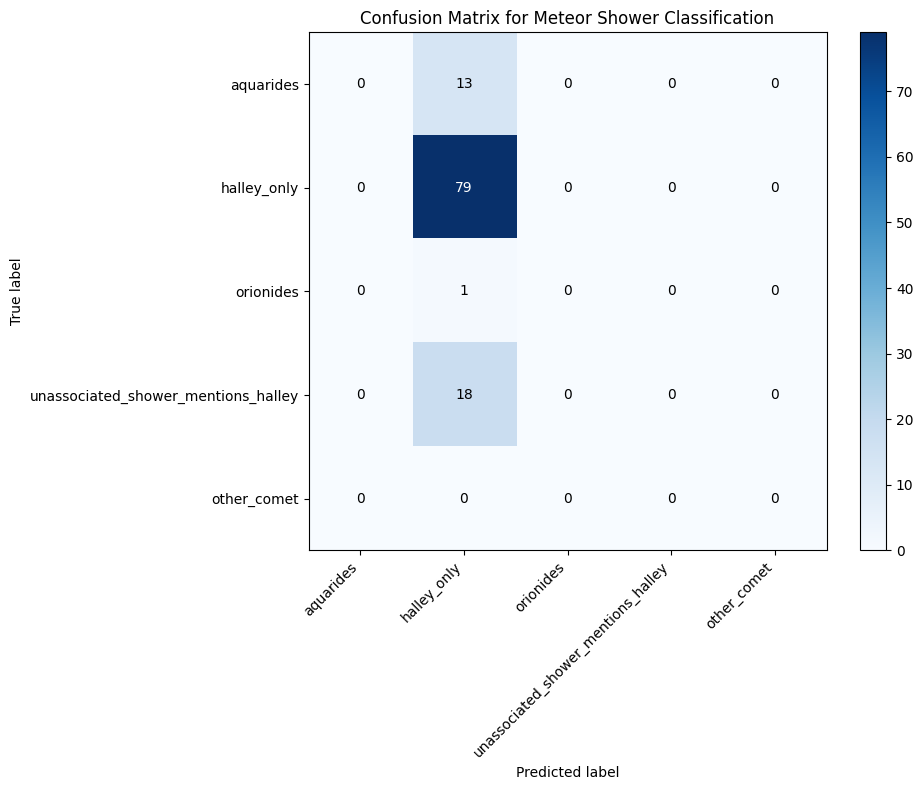

In [19]:
# Plot confusion matrix
plot_confusion_matrix(y_test_shower, y_pred_shower, 
                     figsize=(10, 8), 
                     labels=['aquarides', 'halley_only', 'orionides', 'unassociated_shower_mentions_halley', 'other_comet'], 
                     title="Confusion Matrix for Meteor Shower Classification")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

In [20]:

#Check what features the classifier is learning
# Look at which words are most predictive for each class
feature_names_shower = classifier_shower.named_steps['vectorizer'].get_feature_names_out()
feature_log_prob = classifier_shower.named_steps['classifier'].feature_log_prob_

# For each class, show top 20 words
for i, class_name in enumerate(classifier_shower.classes_):
    print(f"\n=== Top 20 words for {class_name} ===")
    top_indices = np.argsort(feature_log_prob[i])[-20:][::-1]
    for idx in top_indices:
        print(f"  {feature_names_shower[idx]}: {feature_log_prob[i][idx]:.3f}")


=== Top 20 words for aquarides ===
  lune: -3.641
  nord: -3.995
  mal: -3.995
  soleil: -4.096
  gouvernement: -4.098
  anvers: -4.104
  belge: -4.117
  congo: -4.144
  ministre: -4.149
  guerre: -4.176
  président: -4.182
  belges: -4.302
  mme: -4.348
  nuit: -4.351
  musique: -4.355
  français: -4.371
  conseil: -4.403
  concours: -4.412
  politique: -4.427
  chambre: -4.447

=== Top 20 words for halley_only ===
  ministre: -4.083
  gouvernement: -4.109
  roi: -4.126
  chambre: -4.165
  exposition: -4.259
  président: -4.273
  liège: -4.276
  femme: -4.302
  mort: -4.322
  hier: -4.324
  jeune: -4.354
  société: -4.358
  loi: -4.367
  question: -4.380
  mme: -4.392
  belge: -4.397
  conseil: -4.399
  travail: -4.401
  eau: -4.408
  londres: -4.427

=== Top 20 words for orionides ===
  lune: -4.302
  millions: -4.336
  eau: -4.382
  allemagne: -4.393
  nord: -4.440
  roi: -4.441
  jean: -4.454
  etat: -4.481
  gouvernement: -4.485
  compte: -4.487
  programme: -4.489
  président: -